# Problem Statement

#####  OList is an e-commerce company that has faced some losses recently and they want to manage their inventory very well so as to reduce any unnecessary costs that they might be bearing. In this assignment, you have to manage the inventory cost of this e-commerce company OList. You need to identify top products that contribute to the revenue and also use market basket analysis to analyse the purchase behaviour of individual customers to estimate with relative certainty, what items are more likely to be purchased individually or in combination with some other products.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### reading the sheets in the excel file

In [2]:
# orders sheet

orders = pd.read_excel('Retail_dataset.xlsx',sheet_name = 'orders')
orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [3]:
#checkin shape of the dataframe
orders.shape

(99441, 7)

In [4]:
# checking the info
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_timestamp      96476 non-null  datetime64[ns]
 6   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(3)
memory usage: 5.3+ MB


##### the datatypes are correct for all the columns

In [5]:
# only considering order with order_status as 'Delivered'
orders = orders[orders['order_status']=='delivered']

In [6]:
#checking the shape again
orders.shape

(96478, 7)

In [7]:
# cheking for duplicate records
orders.order_id.duplicated().sum()

0

##### there are no duplicate enteries in this dataframe

In [8]:
#cheking for null values
orders.isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_timestamp         8
order_estimated_delivery_date     0
dtype: int64

##### there are 14 null values in order_approved_at column and 8 values in order_delivered_timestamp column

In [9]:
# checking for null values percentage
orders.isna().sum()/len(orders)*100

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.014511
order_delivered_timestamp        0.008292
order_estimated_delivery_date    0.000000
dtype: float64

##### The null value percentage is very low, so these can be dropped also but let's see if we can impute them easily.

In [10]:
#looking at these records
orders[orders.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,8a9a08c7ca8900a200d83cf838a07e0b,delivered,2017-02-18 14:40:00,NaT,2017-03-01 13:25:33,2017-03-17
16567,8a9adc69528e1001fc68dd0aaebbb54a,91efb7fcabc17925099dced52435837f,delivered,2017-02-18 12:45:31,NaT,2017-03-02 10:05:06,2017-03-21
19031,7013bcfc1c97fe719a7b5e05e61c12db,e1f01a1bd6485e58ad3c769a5427d8a8,delivered,2017-02-18 13:29:47,NaT,2017-03-01 08:07:38,2017-03-17
22663,5cf925b116421afa85ee25e99b4c34fb,7e1a5ca61b572d76b64b6688b9f96473,delivered,2017-02-18 16:48:35,NaT,2017-03-09 07:28:47,2017-03-31
23156,12a95a3c06dbaec84bcfb0e2da5d228a,c8822fce1d0bfa7ddf0da24fff947172,delivered,2017-02-17 13:05:55,NaT,2017-03-02 11:09:19,2017-03-20
26800,c1d4211b3dae76144deccd6c74144a88,6ff8b0d7b35d5c945633b8d60165691b,delivered,2017-01-19 12:48:08,NaT,2017-01-30 18:16:01,2017-03-01
38290,d69e5d356402adc8cf17e08b5033acfb,2e0a2166aa23da2472c6a60c4af6f7a6,delivered,2017-02-19 01:28:47,NaT,2017-03-02 03:41:58,2017-03-27
39334,d77031d6a3c8a52f019764e68f211c69,c4c0011e639bdbcf26059ddc38bd3c18,delivered,2017-02-18 11:04:19,NaT,2017-03-02 16:15:23,2017-03-22
48401,7002a78c79c519ac54022d4f8a65e6e8,d49f3dae6bad25d05160fc17aca5942d,delivered,2017-01-19 22:26:59,NaT,2017-02-06 14:22:19,2017-03-16
61743,2eecb0d85f281280f79fa00f9cec1a95,5a4fa4919cbf2b049e72be460a380e5b,delivered,2017-02-17 17:21:55,NaT,2017-03-03 12:16:03,2017-03-20


##### we can replace these null values with order_purchase_timestamp considering that these orders were approved at the same time as they were placed at

In [11]:
# replacing null values in order_approved_at column:
orders.order_approved_at.fillna(orders.order_purchase_timestamp, inplace = True)

In [12]:
# the second column with null values:
orders[orders.order_delivered_timestamp.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,13467e882eb3a701826435ee4424f2bd,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,NaT,2017-12-18
20618,f5dd62b788049ad9fc0526e3ad11a097,2f17c5b324ad603491521b279a9ff4de,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,NaT,2018-07-16
43834,2ebdfc4f15f23b91474edf87475f108e,1bd06a0c0df8b23dacfd3725d2dc0bb9,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,NaT,2018-07-30
79263,e69f75a717d64fc5ecdfae42b2e8e086,3bc508d482a402715be4d5cf4020cc81,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,NaT,2018-07-30
82868,0d3268bad9b086af767785e3f0fc0133,ebf7e0d43a78c81991a4c59c145c75db,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,NaT,2018-07-24
92643,2d858f451373b04fb5c984a1cc2defaf,d77cf4be2654aa70ef150f8bfec076a6,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,2017-06-23
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,cce5e8188bf42ffb3bb5b18ff58f5965,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,NaT,2018-06-26
98038,20edc82cf5400ce95e1afacc25798b31,175378436e2978be55b8f4316bce4811,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,NaT,2018-07-19


##### we can replace these null values with order_estimated_delivery_date considering that these orders were delivered at the promised delivery time

In [13]:
# replacing null values in order_delivered_timestamp column:
orders.order_delivered_timestamp.fillna(orders.order_estimated_delivery_date, inplace = True)

In [14]:
# checking for null value count again
orders.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
dtype: int64

In [15]:
#filtering out delivered order_ids
delivered_orders=list(orders.loc[:,'order_id'])
delivered_orders

['e481f51cbdc54678b7cc49136f2d6af7',
 '53cdb2fc8bc7dce0b6741e2150273451',
 '47770eb9100c2d0c44946d9cf07ec65d',
 '949d5b44dbf5de918fe9c16f97b45f8a',
 'ad21c59c0840e6cb83a9ceb5573f8159',
 'a4591c265e18cb1dcee52889e2d8acc3',
 '6514b8ad8028c9f2cc2374ded245783f',
 '76c6e866289321a7c93b82b54852dc33',
 'e69bfb5eb88e0ed6a785585b27e16dbf',
 'e6ce16cb79ec1d90b1da9085a6118aeb',
 '34513ce0c4fab462a55830c0989c7edb',
 '82566a660a982b15fb86e904c8d32918',
 '5ff96c15d0b717ac6ad1f3d77225a350',
 '432aaf21d85167c2c86ec9448c4e42cc',
 'dcb36b511fcac050b97cd5c05de84dc3',
 '403b97836b0c04a622354cf531062e5f',
 '116f0b09343b49556bbad5f35bee0cdf',
 '85ce859fd6dc634de8d2f1e290444043',
 '83018ec114eee8641c97e08f7b4e926f',
 '203096f03d82e0dffbc41ebc2e2bcfb7',
 'f848643eec1d69395095eb3840d2051e',
 '2807d0e504d6d4894d41672727bc139f',
 '95266dbfb7e20354baba07964dac78d5',
 'f3e7c359154d965827355f39d6b1fdac',
 'fbf9ac61453ac646ce8ad9783d7d0af6',
 'acce194856392f074dbf9dada14d8d82',
 'dd78f560c270f1909639c11b925620ea',
 

In [16]:
len(delivered_orders)

96478

In [17]:
# order_items sheet
order_items =  pd.read_excel('Retail_dataset.xlsx',sheet_name = 'order_items')
order_items.head(5)

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [18]:
#checkin shape of the dataframe
order_items.shape

(112650, 6)

In [19]:
# checking info
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          112650 non-null  object 
 1   order_item_id     112650 non-null  int64  
 2   product_id        112650 non-null  object 
 3   seller_id         112650 non-null  object 
 4   price             112650 non-null  float64
 5   shipping_charges  112650 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 5.2+ MB


##### the datatypes are correct for all the columns

In [20]:
#filtering out records that have order_status='delivered'
order_items = order_items[order_items['order_id'].isin(delivered_orders)]

In [21]:
# checking shape again
order_items.shape

(110197, 6)

In [22]:
# cheking for null value
order_items.isna().sum()

order_id            0
order_item_id       0
product_id          0
seller_id           0
price               0
shipping_charges    0
dtype: int64

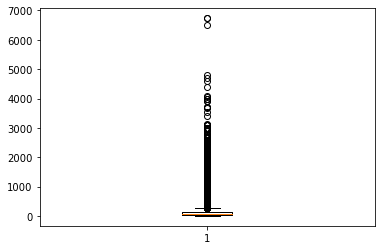

In [24]:
# checking for outliers in price 
plt.boxplot(order_items.price)
plt.show()

In [25]:
order_items.price.describe(percentiles=[0.50,0.75,0.80,0.90,0.95,0.999])

count    110197.000000
mean        119.980563
std         182.299446
min           0.850000
50%          74.900000
75%         134.170000
80%         150.000000
90%         228.942000
95%         349.000000
99.9%      2068.626040
max        6735.000000
Name: price, dtype: float64

In [26]:
order_items[order_items.price>3000]

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,6735.00,194.31
11249,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,4690.00,74.34
12925,1d54db601b417ccdfd3b7071955e6cc7,1,6e729bd456c54469a9af4c8774f1eab7,039e6ad9dae79614493083e241147386,3105.00,104.72
21844,31e50461be6957a749166e97af082d0a,1,6054d161235b97a4aaccea2a086d30b8,4a3ccda38b2129705f3fb522db62ca31,3099.90,55.92
25648,3a4b013e014723cc38c9faa8ffdc6387,1,34f99d82cfc355d08d8db780d14aa002,a00824eb9093d40e589b940ec45c4eb0,3399.99,126.47
28884,41b7766bb1df487d17fb9725b78ff509,1,0563d4cc419141eab2e5b438046e844e,039e6ad9dae79614493083e241147386,3930.00,49.55
29193,426a9742b533fc6fed17d1fd6d143d7e,1,a1beef8f3992dbd4cd8726796aa69c53,512d298ac2a96d1931b6bd30aa21f61d,4399.87,113.45
29787,43bdbd9dc0931d72befdf4765af6c442,1,7e53e051875b2a0c9f22acd8a9a29a20,eeb6de78f79159600292e314a77cbd18,3089.00,317.47
36878,53c71d3953507c6239ff73917ed358c9,1,17d98fc630d23a628ec1130f8d69d1d2,f9244d45189d3a3605499abddeade7d5,3109.99,74.35
45843,68101694e5c5dc7330c91e1bbc36214f,1,6cdf8fc1d741c76586d8b6b15e9eef30,ed4acab38528488b65a9a9c603ff024a,4099.99,75.27


In [27]:
high_price =list(order_items.product_id[order_items.price>3000])

In [28]:
high_price

['489ae2aa008f021502940f251d4cce7f',
 'c3ed642d592594bb648ff4a04cee2747',
 '6e729bd456c54469a9af4c8774f1eab7',
 '6054d161235b97a4aaccea2a086d30b8',
 '34f99d82cfc355d08d8db780d14aa002',
 '0563d4cc419141eab2e5b438046e844e',
 'a1beef8f3992dbd4cd8726796aa69c53',
 '7e53e051875b2a0c9f22acd8a9a29a20',
 '17d98fc630d23a628ec1130f8d69d1d2',
 '6cdf8fc1d741c76586d8b6b15e9eef30',
 '4ca7b91a31637bd24fb8e559d5e015e4',
 '6902c1962dd19d540807d0ab8fade5c6',
 '259037a6a41845e455183f89c5035f18',
 '0cf5798cf0a69ca39b286d63dd5a9501',
 '4c50dcc50f1512f46096d6ef0142c4a9',
 '0eb41884a8773e019708fb8409fd8347',
 'dd113cb02b2af9c8e5787e8f1f0722f6',
 'a6492cc69376c469ab6f61d8f44de961',
 'dd113cb02b2af9c8e5787e8f1f0722f6',
 '1953c4e517bc25739bc4223ede2ff5bc',
 '5e954c4ed342c50436d25d5f50a34919',
 '071930404657f7cd416f75bd063a9d4b',
 '0c104824e973388d487c67a3d346e96d',
 '1bdf5e6731585cf01aa8169c7028d6ad',
 '69c590f7ffc7bf8db97190b6cb6ed62e']

In [29]:
len(high_price)

25

##### these are only handful of records. Also looking at the box plot, we can see that there are outliers, but they are closely stacked to the upper whisker, so values beyond 5000 can be removed as part of the outlir treatment.

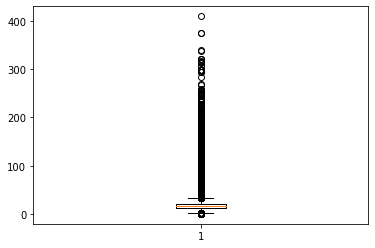

In [30]:
plt.boxplot(order_items.shipping_charges)
plt.show()

In [31]:
order_items.shipping_charges.describe(percentiles=[0.50,0.75,0.80,0.90,0.95,0.999])

count    110197.000000
mean         19.948598
std          15.698136
min           0.000000
50%          16.260000
75%          21.150000
80%          23.280000
90%          33.920000
95%          45.090000
99.9%       174.859840
max         409.680000
Name: shipping_charges, dtype: float64

In [32]:
order_items[order_items.shipping_charges>300]

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
3303,076d1555fb53a89b0ef4d529e527a0f6,1,a3cd9517ebf5a50dca25acce54f3b171,6fa9202c10491e472dffd59a3e82b2a3,2338.08,375.28
3584,0822bcde10bb5d023755a71bc8f7797f,1,363a9f5b97bf194da23858be722a7aa5,9596c870880d900012f2e8e6e30d06d7,990.00,321.46
5037,0b6230647ed16f4b3e70282dc4b5b87f,1,46e24ce614899e36617e37ea1e4aa6ff,17f51e7198701186712e53a39c564617,1050.00,321.88
6268,0e4672661531addf3fa0f55961e55242,1,dc861f18267cce21f3b70f9f7990b8ce,17f51e7198701186712e53a39c564617,990.00,314.02
16731,264a7e199467906c0727394df82d1a6a,1,97c948ebc8c04b26b7bbb095d4228f2a,17f51e7198701186712e53a39c564617,1050.00,338.30
27183,3dd5626c63f493f8b8f8788c2be24baa,1,3a1855685a49813f60e6193864f7215e,c510bc1718f0f2961eaa42a23330681a,2699.00,306.06
28044,3fde74c28a3d5d618c00f26d51baafa0,1,a3cd9517ebf5a50dca25acce54f3b171,6fa9202c10491e472dffd59a3e82b2a3,2338.08,375.28
29787,43bdbd9dc0931d72befdf4765af6c442,1,7e53e051875b2a0c9f22acd8a9a29a20,eeb6de78f79159600292e314a77cbd18,3089.00,317.47
48320,6ddfbf514959b49b6410c01ad93054bb,1,363a9f5b97bf194da23858be722a7aa5,9596c870880d900012f2e8e6e30d06d7,1045.00,314.40
69797,9f49bd16053df810384e793386312674,1,256a9c364b75753b97bee410c9491ad8,5c030029b5916fed0986310385ec9009,1149.00,339.59


##### there seems to be some values which are far away from the normal range. We can dig deeper and try to find out if these are due to a larger delivery distance.

In [33]:
# customers sheet
customers =  pd.read_excel('Retail_dataset.xlsx',sheet_name = 'customers')
customers.head(5)


,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [34]:
#checkin shape of the dataframe
customers.shape

(99441, 4)

In [35]:
# checking info
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_zip_code_prefix  99441 non-null  int64 
 2   customer_city             99441 non-null  object
 3   customer_state            99441 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.0+ MB


##### the datatypes are correct for all the columns

In [36]:
# cheking for null value
customers.isna().sum()

customer_id                 0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [37]:
# checking for duplicate records
customers.customer_id.duplicated().sum()

3345

In [38]:
## Drop the duplicate values
customers.drop_duplicates(subset="customer_id", keep="first", inplace = True)

In [39]:
#checking duplicate count again
customers.customer_id.duplicated().sum()

0

In [40]:
#checking shape again
customers.shape

(96096, 4)

In [41]:
# payments sheet
payments =  pd.read_excel('Retail_dataset.xlsx',sheet_name = 'payments')
payments.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [42]:
# checking info
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


##### the datatypes are correct for all the columns

In [43]:
#checking shape
payments.shape

(103886, 5)

In [44]:
# checking for null values
payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [45]:
# filtering out delivered orders
payments = payments[payments['order_id'].isin(delivered_orders)]

In [46]:
payments.shape

(100756, 5)

In [47]:
#products sheet
products =  pd.read_excel('Retail_dataset.xlsx',sheet_name = 'products')
products.head(5)

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0


In [48]:
# checking the shape
products.shape

(32951, 6)

In [49]:
#checking info
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32951 non-null  object 
 1   product_category_name  32781 non-null  object 
 2   product_weight_g       32949 non-null  float64
 3   product_length_cm      32949 non-null  float64
 4   product_height_cm      32949 non-null  float64
 5   product_width_cm       32949 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.5+ MB


##### the datatypes are correct for all the columns

In [50]:
#checking for null values
products.isna().sum()

product_id                 0
product_category_name    170
product_weight_g           2
product_length_cm          2
product_height_cm          2
product_width_cm           2
dtype: int64

In [51]:
# taking a look at these records
products[products.product_category_name.isna()].head(10)

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,300.0,35.0,7.0,12.0
244,e10758160da97891c2fdcbc35f0f031d,NaN,2200.0,16.0,2.0,11.0
294,39e3b9b12cd0bf8ee681bbc1c130feb5,NaN,300.0,16.0,7.0,11.0
299,794de06c32a626a5692ff50e4985d36f,NaN,300.0,18.0,8.0,14.0
347,7af3e2da474486a3519b0cba9dea8ad9,NaN,200.0,22.0,14.0,14.0
428,629beb8e7317703dcc5f35b5463fd20e,NaN,1400.0,25.0,25.0,25.0


##### replacing these nan values with mode of this column

In [52]:
products.product_category_name.value_counts()

toys                                 24725
bed_bath_table                         789
sports_leisure                         721
furniture_decor                        687
health_beauty                          648
                                     ...  
fashion_childrens_clothes                1
diapers_and_hygiene                      1
home_comfort_2                           1
security_and_services                    1
furniture_mattress_and_upholstery        1
Name: product_category_name, Length: 70, dtype: int64

In [53]:
m=products.product_category_name.mode()[0]
m

'toys'

In [54]:
products.product_category_name.fillna(m,inplace=True)

In [55]:
#checking for null count again
products.isna().sum()

product_id               0
product_category_name    0
product_weight_g         2
product_length_cm        2
product_height_cm        2
product_width_cm         2
dtype: int64

In [56]:
##### replacing all these other columns with mean values of the columns
products.product_weight_g.fillna(products.product_weight_g.mean(), inplace = True)
products.product_length_cm.fillna(products.product_length_cm.mean(), inplace = True)
products.product_height_cm.fillna(products.product_height_cm.mean(), inplace = True)
products.product_width_cm.fillna(products.product_width_cm.mean(), inplace = True)

In [57]:
#checking for null count again
products.isna().sum()

product_id               0
product_category_name    0
product_weight_g         0
product_length_cm        0
product_height_cm        0
product_width_cm         0
dtype: int64

#### All the sheets have been cleaned and can be imported as a new excel to be read in tableau

In [58]:
#using Excel Writer:
Olist_data = pd.ExcelWriter('Retail_Dataset_cleaned.xlsx',engine='xlsxwriter')

In [59]:
orders.to_excel(Olist_data, sheet_name = "order", index = False)
order_items.to_excel(Olist_data, sheet_name = "order_items", index = False)
customers.to_excel(Olist_data, sheet_name = "customers", index = False)
payments.to_excel(Olist_data, sheet_name = "payments", index = False)
products.to_excel(Olist_data, sheet_name = "products", index = False)

In [60]:
Olist_data.save()
print("Files exported successfully.")

Files exported successfully.


In [61]:
## checking if the export was successful
import os
os.getcwd()

'C:\\Users\\TBP'

### Creating Data for Market Basket Analysis

In [62]:
# reading the new retail dataset excel 
ordered_items = pd.read_excel(r'C:\\Users\\TBP\\Retail_Dataset_cleaned.xlsx',sheet_name='order_items')
ordered_items.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [63]:
prods = pd.read_excel(r'C:\\Users\\TBP\\Retail_Dataset_cleaned.xlsx',sheet_name='products')
prods.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0


In [64]:
# merging both the dataframes using the common column product_id
df = pd.merge(ordered_items, prods, on = "product_id", how = "inner", indicator = True)

In [65]:
df.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,_merge
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,toys,650.0,28.0,9.0,14.0,both
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.9,17.96,toys,650.0,28.0,9.0,14.0,both
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,64.9,18.33,toys,650.0,28.0,9.0,14.0,both
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,16.17,toys,650.0,28.0,9.0,14.0,both
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,toys,650.0,28.0,9.0,14.0,both


##### we need only order_id and product_category_name for our Market Basket Analysis

In [67]:
# filtering the dataframe to two columns
df = df[["order_id", "product_category_name"]]
df.head()

,order_id,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,toys
1,130898c0987d1801452a8ed92a670612,toys
2,532ed5e14e24ae1f0d735b91524b98b9,toys
3,6f8c31653edb8c83e1a739408b5ff750,toys
4,7d19f4ef4d04461989632411b7e588b9,toys


In [68]:
# converting this dataframe to excel sheet
Market_Basket = pd.ExcelWriter("Market_Basket_Analysis.xlsx", engine = 'xlsxwriter')

In [69]:
df.to_excel(Market_Basket, sheet_name = 'ord_prod', index = False)

In [70]:
Market_Basket.save()
print("Files exported successfully.")

Files exported successfully.


In [71]:
# checking if the export was successful
import os
os.getcwd()

'C:\\Users\\TBP'